### 1.Perceptron 

In [2]:
#Perceptron with Sklearn over iris data set
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron # Perceptron as linear model
iris = load_iris()
X = iris.data[:, (2, 3)] # petal length, petal width
y = (iris.target == 0).astype(np.int) # Iris Setosa?
per_clf = Perceptron()
per_clf.fit(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      max_iter=None, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [3]:
y_pred = per_clf.predict([[2, 0.5]])

In [4]:
print("Predicted Class",y_pred)

Predicted Class [1]


#### perceptron for basic (AND & OR) gates

In [5]:
# perceptron for basic (AND & OR) gates
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy import optimize
from ipywidgets import *
from IPython.display import SVG
from sklearn import datasets

In [6]:
AND = pd.DataFrame({'x1': (0,0,1,1), 'x2': (0,1,0,1), 'y': (0,0,0,1)})
AND

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [7]:
w = np.random.randn(3)*1e-4
w

array([-1.36313448e-04, -3.60749951e-05,  1.33255976e-04])

In [8]:
g = lambda inputs, weights: np.where(np.dot(inputs, weights)>0, 1, 0)

In [9]:
def train(inputs, targets, weights, eta, n_iterations):
    # Add the inputs that match the bias node
    inputs = np.c_[inputs, -np.ones((len(inputs), 1))]
    for n in range(n_iterations):
        activations = g(inputs, weights);
        weights -= eta*np.dot(np.transpose(inputs), activations - targets)
    return(weights)

In [10]:
inputs = AND[['x1','x2']]
target = AND['y']
w = train(inputs, target, w, 0.25, 10)
w

array([0.24986369, 0.24996393, 0.25013326])

In [11]:
g(np.c_[inputs, -np.ones((len(inputs), 1))], w)

array([0, 0, 0, 1])

Remark- Correct Answer


In [12]:
#OR
OR = pd.DataFrame({'x1': (0,0,1,1), 'x2': (0,1,0,1), 'y': (0,1,1,1)})
OR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [13]:
w = np.random.randn(3)*1e-4

In [14]:
inputs = OR[['x1','x2']]
target = OR['y']
w = train(inputs, target, w, 0.25, 20)
w

array([2.49974429e-01, 6.91343761e-05, 9.71892340e-06])

In [15]:
g(np.c_[inputs, -np.ones((len(inputs), 1))], w)

array([0, 1, 1, 1])

Correct Answer

In [16]:
#XOR
XOR = pd.DataFrame({'x1': (0,0,1,1), 'x2': (0,1,0,1), 'y': (0,1,1,0)})
XOR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [17]:
w = np.random.randn(3)*1e-4
w

array([-1.79176570e-04,  2.13294650e-05, -9.91837765e-05])

In [18]:
inputs = OR[['x1','x2']]
target = OR['y']
w = train(inputs, target, w, 0.25, 20)

In [19]:
g(np.c_[inputs, -np.ones((len(inputs), 1))], w)

array([0, 1, 1, 1])

Wrong Result- Look Description in cell No. 22, below

#### Plot

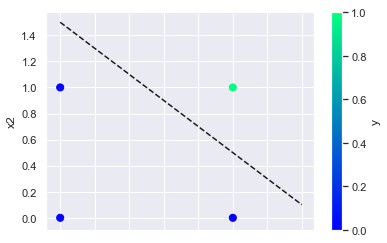

In [20]:
AND.plot(kind='scatter', x='x1', y='x2', c='y', s=50, colormap='winter')
plt.plot(np.linspace(0,1.4), 1.5 - 1*np.linspace(0,1.4), 'k--');

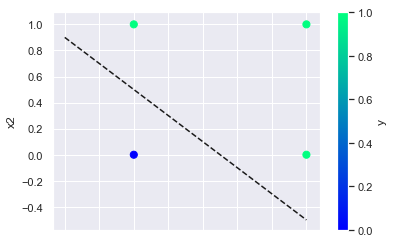

In [21]:
OR.plot(kind='scatter', x='x1', y='x2', c='y', s=50, colormap='winter')
plt.plot(np.linspace(-.4,1), .5 - 1*np.linspace(-.4,1), 'k--');

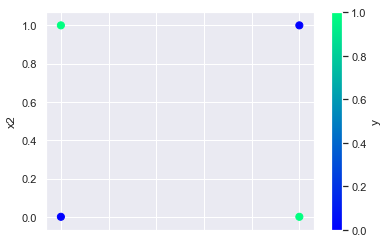

In [22]:
XOR = pd.DataFrame({'x1': (0,0,1,1), 'x2': (0,1,0,1), 'y': (0,1,1,0)})
XOR.plot(kind='scatter', x='x1', y='x2', c='y', s=50, colormap='winter');

XOR- Wrong result description:- after plot we can observe that the green points are 1's and cant be linearly seperable, we required an ovel or circle to cover means rather than linear it requires more non-linear function to cover

#### Solution- MPL

The solution to fitting more complex (i.e. non-linear) models with neural networks is to use a more
complex network that consists of more than just a single perceptron. The take-home message from
the perceptron is that all of the learning happens by adapting the synapse weights until prediction is
satisfactory. Hence, a reasonable guess at how to make a perceptron more complex is to simply
add more weights.
There are two ways to add complexity:
1. Add backward connections, so that output neurons feed back to input nodes, resulting in a
recurrent network
2. Add neurons between the input nodes and the outputs, creating an additional ("hidden")
layer to the network, resulting in a multi-layer perceptron


Updating a multi-layer perceptron (MLP) is a matter of:
1. moving forward through the network, calculating outputs given inputs and current weight
estimates
2. moving backward updating weights according to the resulting error from forward
propagation.


### Back propagation

Back Propagation:https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/

In [23]:
#XOR using Back Propagation

from __future__ import print_function
import numpy as np

def sigmoid(x):
    return 1/(1 + np.exp(-x))

class SigmoidLayer:
    def __init__(self, n_input, n_output):
        self.W = np.random.randn(n_output, n_input)
        self.b = np.random.randn(n_output, 1)
    def output(self, X):
        if X.ndim == 1:
            X = X.reshape(-1, 1)
        return sigmoid(self.W.dot(X) + self.b)

class SigmoidNetwork:

    def __init__(self, layer_sizes):
        '''
        :parameters:
            - layer_sizes : list of int
                List of layer sizes of length L+1 (including the input dimensionality)
        '''
        self.layers = []
        for n_input, n_output in zip(layer_sizes[:-1], layer_sizes[1:]):
            self.layers.append(SigmoidLayer(n_input, n_output))
    
    def train(self, X, y, learning_rate=0.2):
        X = np.array(X)
        y = np.array(y)
        if X.ndim == 1:
            X = X.reshape(-1, 1)
        if y.ndim == 1:
            y = y.reshape(1, -1)
        
        # Forward pass - compute a^n for n in {0, ... L}
        layer_outputs = [X]
        for layer in self.layers:
            layer_outputs.append(layer.output(layer_outputs[-1]))
        
        # Backward pass - compute \partial C/\partial z^m for m in {L, ..., 1}
        cost_partials = [layer_outputs[-1] - y]
        for layer, layer_output in zip(reversed(self.layers), reversed(layer_outputs[:-1])):
            cost_partials.append(layer.W.T.dot(cost_partials[-1])*layer_output*(1 - layer_output))
        cost_partials.reverse()
        
        # Compute weight gradient step
        W_updates = []
        for cost_partial, layer_output in zip(cost_partials[1:], layer_outputs[:-1]):
            W_updates.append(cost_partial.dot(layer_output.T)/X.shape[1])
        # and biases
        b_updates = [cost_partial.mean(axis=1).reshape(-1, 1) for cost_partial in cost_partials[1:]]
        
        for W_update, b_update, layer in zip(W_updates, b_updates, self.layers):
            layer.W -= W_update*learning_rate
            layer.b -= b_update*learning_rate

    def output(self, X):
        a = np.array(X)
        if a.ndim == 1:
            a = a.reshape(-1, 1)
        for layer in self.layers:
            a = layer.output(a)
        return a

In [24]:
nn = SigmoidNetwork([2, 2, 1])
X = np.array([[0, 1, 0, 1], 
              [0, 0, 1, 1]])
y = np.array([0, 1, 1, 0])
for n in range(int(1e3)):
    nn.train(X, y, learning_rate=1.)
print("Input\tOutput\tQuantized")
for i in [[0, 0], [1, 0], [0, 1], [1, 1]]:
    print("{}\t{:.4f}\t{}".format(i, nn.output(i)[0, 0], 1*(nn.output(i)[0] > .5)))

Input	Output	Quantized
[0, 0]	0.0124	[0]
[1, 0]	0.9859	[1]
[0, 1]	0.9858	[1]
[1, 1]	0.0222	[0]


In [25]:
#sigmoid plot
logistic = lambda h, beta: 1./(1 + np.exp(-beta * h))

@interact(beta=(-1, 25))
def logistic_plot(beta=5):
    hvals = np.linspace(-2, 2)
    plt.plot(hvals, logistic(hvals, beta))

interactive(children=(IntSlider(value=5, description='beta', max=25, min=-1), Output()), _dom_classes=('widget…

In [26]:
hyperbolic_tangent = lambda h: (np.exp(h) - np.exp(-h)) / (np.exp(h) + np.exp(-h))

@interact(theta=(-1, 25))
def tanh_plot(theta=5):
    hvals = np.linspace(-2, 2)
    h = hvals*theta
    plt.plot(hvals, hyperbolic_tangent(h))

interactive(children=(IntSlider(value=5, description='theta', max=25, min=-1), Output()), _dom_classes=('widge…

In [66]:
import matplotlib.pyplot as plt

output = lambda z :np.maximum(0., z)
# relu vialuzation
@interact(m=(-1,25))
def relu(m=1):
    hvals = np.linspace(-10, 10, 100)
    r= hvals*m
    plt.plot(hvals, output(r))
    plt.xlabel("x")
    plt.ylabel("relu(x)")

interactive(children=(IntSlider(value=1, description='m', max=25, min=-1), Output()), _dom_classes=('widget-in…